# Capstone Webscrapping using BeautifulSoup - Data kurs US Dollar ke rupiah

This notebook contains guidances & tasks on the data processing for the application

## Project Background, Objective and Workflow

### Project Background
The project is focused on webscraping exchange rates data of US Dollar to Indonesian Rupiah from the website https://www.exchange-rates.org/exchange-rate-history/usd-idr using the BeautifulSoup library. The data is then cleaned and visualized using pandas and matplotlib libraries. The aim of the project is to extract useful insights from the exchange rate data and to present it in a meaningful way to the stakeholders.

### Project Objective
The main objective of the project is to perform web scraping using BeautifulSoup library on the website https://www.exchange-rates.org/exchange-rate-history/usd-idr to extract the exchange rate data of US Dollar to Indonesian Rupiah. The extracted data is then cleaned and visualized to provide useful insights to the stakeholders.

### Project Workflow
The project follows the following workflow:

1. Importing the required libraries such as requests, BeautifulSoup, pandas, and matplotlib.
2. Sending a request to the website using requests library.
3. Parsing the HTML content using BeautifulSoup library.
4. Extracting the exchange rate data from the parsed HTML content.
5. Cleaning the extracted data by removing unwanted characters and converting data types.
6. Visualizing the cleaned data using matplotlib library.

***

## Import Module
This code imports four different modules in Python: requests, BeautifulSoup, pandas, and matplotlib.pyplot.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

- **requests** is a module that allows Python to send HTTP requests to a website and receive responses. This is often used in web scraping to collect data from websites.

- **BeautifulSoup** is a Python library that allows for easy parsing and navigation of HTML and XML documents. This can be helpful when scraping data from websites and extracting specific information.

- **pandas** is a data manipulation library in Python that provides various data structures and functions to work with tabular data, like spreadsheets or databases.

- **matplotlib.pyplot** is a plotting library in Python that provides various functions to create different types of charts and plots, like bar charts, line graphs, and histograms.

Overall, these modules are commonly used together in data science and web scraping projects to collect, manipulate, and visualize data.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [3]:
url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [5]:
soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

In [13]:
table = soup.find('table', attrs={'class':'history-rates-data'})
if table:
    print(table.prettify()[1:500])
else:
    print("Could not find element")

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-04-13">
     April 13, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-04-13">
     2023-4-13
    </a>
   </td>
   <td>
    <span class="w">
     <span class="n


This code is using the Python library **BeautifulSoup** to search for a specific table element on a webpage.

- First, it searches for a table element with the class attribute "history-rates-data" using the find method from the **BeautifulSoup**  library. It stores the result in the table variable.

- Next, the code checks if a table element was found by using an if statement to check if table has a value (i.e., it is not None). 
  - If a table element was found, the code prints the prettified HTML content of the first 500 characters of the table using the prettify() method of the BeautifulSoup library.
  - If a table element was not found, the code prints "Could not find element".

Overall, this code is used in web scraping to check if a specific table element is present on a webpage and print its content if it exists. It's a useful way to verify that the webpage has the expected content before attempting to extract specific data from the table.

## Finding row length.

In [7]:
row = table.find_all('a', attrs={'class':'w'})
row_length = len(row)
row_length

129

This code is used in web scraping to extract data from a webpage.

- The code uses the **find_all** method from the BeautifulSoup library to search for all the anchor elements (a tags) with the class attribute "w" within a table element. It stores the result in the row variable, which is a list of **BeautifulSoup** Tag objects.

- Next, the code uses the built-in len function in Python to get the length of the row list. The length of the list is stored in the row_length variable.


## Looping Process

In [8]:
temp = [] #init

for i in range(0, row_length):
    
    #get Period
    period = table.find_all('a', attrs={'class':'n'})[i].text
    
    #get inflation yoy
    price = table.find_all('span', attrs={'class':'w'})[i].text
    price = price.strip() #to remove excess white space
    
    temp.append((period, price)) 
    
temp 

[('2023-4-13', '$1 = Rp14,722'),
 ('2023-4-12', '$1 = Rp14,835'),
 ('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = Rp14,969'),
 ('2023-3-30', '$1 = Rp15,024'),
 ('2023-3-29', '$1 = Rp15,034'),
 ('2023-3-28', '$1 = Rp15,060'),
 ('2023-3-27', '$1 = Rp15,107'),
 ('2023-3-24', '$1 = Rp15,165'),
 ('2023-3-23', '$1 = Rp15,085'),
 ('2023-3-22', '$1 = Rp15,253'),
 ('2023-3-21', '$1 = Rp15,301'),
 ('2023-3-20', '$1 = Rp15,343'),
 ('2023-3-17', '$1 = Rp15,375'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-3', '$1 = Rp15,278'),
 ('2023-3-2', '$1 = 

This code is also used in web scraping to extract data from a table element on a webpage.

- First, the code initializes an empty list called temp using temp = [].

- Next, the code uses a for loop to iterate over a range of numbers from 0 to the value stored in row_length. row_length is assumed to be the number of anchor elements with the class attribute "w" within a specific table element on the webpage.

  - Inside the for loop, the code extracts data from the table element for each iteration. It uses the **find_all** method from the **BeautifulSoup** library to search for the anchor elements with the class attribute "n" and "w" to get the period and the inflation rate, respectively. It uses the text attribute to extract the text content of the elements.
  - **Strip()** method is used to remove any excess whitespace from the inflation rate before storing it in the price variable.

- Finally, the code creates a tuple with the period and the inflation rate and appends it to the temp list using the append() method. The temp list now contains a list of tuples, where each tuple represents a row of data from the table.

The code then prints the temp list, which displays the extracted data from the table in a readable format.

Overall, this code is used to extract and store specific data from a table element on a webpage. It's a common technique used in web scraping to extract structured data from HTML documents.

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','price'))
df.head()

,period,price
0,2023-4-13,"$1 = Rp14,722"
1,2023-4-12,"$1 = Rp14,835"
2,2023-4-11,"$1 = Rp14,915"
3,2023-4-10,"$1 = Rp14,950"
4,2023-4-7,"$1 = Rp14,941"


## Data Wrangling & Cleaning

In [10]:
df['price'] = df['price'].str.replace('$1 = Rp', '', regex = False).str.replace(',', '.').astype('float64')
df['period'] = df['period'].astype('datetime64')
df = df.set_index('period')
df.dtypes
df.head()

,period,price
0,2023-04-13,14.722
1,2023-04-12,14.835
2,2023-04-11,14.915
3,2023-04-10,14.950
4,2023-04-07,14.941


This code is used to clean and format data that has been extracted from a table on a webpage using web scraping techniques.

- The code assumes that there is a pandas DataFrame object called **df** that contains two columns, 'price' and 'period'. The 'price' column contains values that have a format of "$1 = Rp x,xxx.xx", where 'x' represents a digit. The 'period' column contains date values in string format.

- The first line of code uses the **str.replace()** method to replace the string "$1 = Rp" with an empty string in the 'price' column. It then replaces all commas in the 'price' column with a period using the same method. Finally, it converts the 'price' column to a float data type using the **astype()** method.

- The second line of code uses the **astype()** method again to convert the 'period' column to a datetime data type.

Overall, this code is used to clean and format data that has been extracted from a table on a webpage. By cleaning the data, it makes it easier to work with and analyze using various data analysis tools and techniques.

## Data visualisation

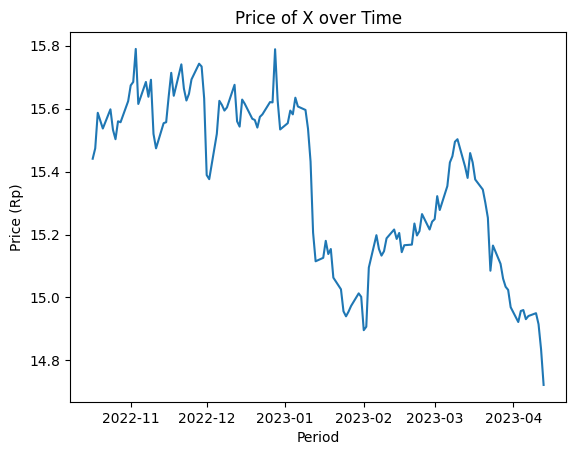

In [11]:
plt.plot(df['period'], df['price'])
plt.xlabel('Period')
plt.ylabel('Price (Rp)')
plt.title('Price of X over Time')
plt.show()

This code is used to create a line plot using the **matplotlib** library. It assumes that there is a pandas DataFrame object called **df** that contains two columns, 'price' and 'period'.

- The first line of code uses the **plot()** function from matplotlib to create a line plot of the 'price' column against the 'period' column of the DataFrame. The 'period' column is used as the x-axis and the 'price' column is used as the y-axis.

- The second line of code uses the **xlabel()** function to add a label to the x-axis of the plot.

- The third line of code uses the **ylabel()** function to add a label to the y-axis of the plot.

- The fourth line of code uses the **title()** function to add a title to the plot.

- Finally, the **show()** function is called to display the plot.

Overall, this code is used to create a line plot of the 'price' column against the 'period' column of the DataFrame using the **matplotlib** library. The plot is then displayed using the **show()** function. This plot can be used to visually analyze the trend of the 'price' column over time, which can help in making informed decisions.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

With the provided code, we can get the following information from the graph:

- The trend of the USD to IDR exchange rate over time.
   - As you can see from the grapht above, the trend right now are in bearish trend or downtrend. from the 2022-11 to 2023-04 (6 month period)
- The highest and lowest points of the exchange rate during the given time period.
   - The highest Point are in 2022-11 : 15,790  Point
   - The Lowest Point are in 2023-04 : 	14,722  Point
- The general volatility of the exchange rate over time.
   - The Highest Volality are in between period of 2023-01 to 2023-04, where the price swing move between 0 - 800 rupiah in just short period of time. Maybe it happen because there's an big event or anomaly in the market 
   - The Lowest Volality are in between period of 2022-11 to 2022-12, where the price is just bounce up between support (Rp 15,500) and resistance (Rp 15,800). This indicates that the market are on sideway
- The frequency of changes in the exchange rate, whether it is fluctuating frequently or stable for certain periods of time.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.